# Analisis de Datos

[x] Normalizar valores
- Comprobar dimensionalidad -> imagenes 28x28 en escala de grises
- Valores atipicos
- Anadir representacion de los datos en forma de un cluster inicial

In [3]:
from utils.mnist_reader import load_mnist
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import sklearn.manifold
from  sklearn.model_selection import GridSearchCV
import numpy as np
from time import time

X_train: (50000, 784), y_train: (50000,)
X_dev: (10000, 784), y_dev: (10000,)
X_test: (10000, 784), y_test: (10000,)

y_train: 9
X_train:


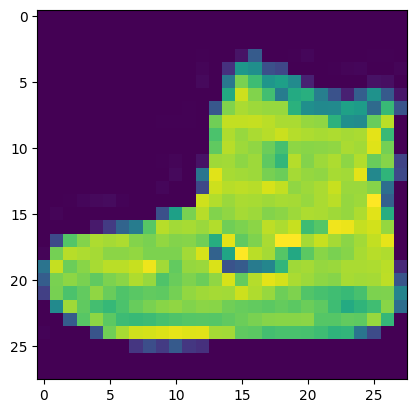

In [14]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')
X_train, X_dev = X_train[:50000], X_train[50000:]
y_train, y_dev = y_train[:50000], y_train[50000:]

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_dev: {X_dev.shape}, y_dev: {y_dev.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

#print('X_train:', X_train[0])
print('\ny_train:', y_train[0])
print('X_train:')
plt.imshow(np.reshape(X_train[0],(28,28)));




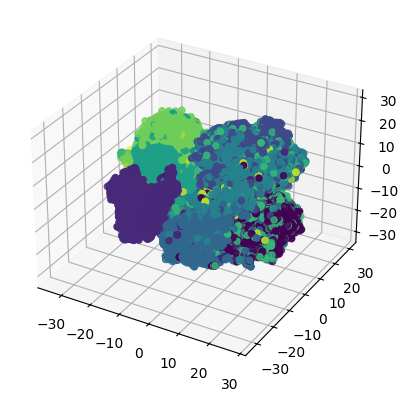

In [6]:
X_embedded = sklearn.manifold.TSNE(n_components=3).fit_transform(X_train)
# 2d plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y_train);
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2],c=y_train);

# Determinacion de Agrupamientos

- Silhouette
- V measure
- Rand index

In [15]:
clustering_methods = {
    'KMeans': KMeans(),
   # 'DBSCAN': DBSCAN(),
    #'Agglomerative': AgglomerativeClustering()
}

param_grids = {
    'KMeans': {
        'n_clusters': [8, 9, 10, 11],
        'init': ['k-means++', 'random']#,
  #      'max_iter': [300, 500]
    },
    'DBSCAN': {
        'eps': [0.3, 0.5, 0.7],
        'min_samples': [5, 10, 15, 20]
    }#,
  #  'Agglomerative': {
  #      'n_clusters': [7, 8, 9, 10, 11],
  #      'linkage': ['ward', 'complete', 'average']
  #  }
}

# Function to evaluate each model and its hyperparameters
def try_clustering(X_train, clustering_methods, param_grids):
    results = {}

    for name, model in clustering_methods.items():
        start = time()
        
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='adjusted_mutual_info_score', n_jobs=-1, verbose = 3)
        grid_search.fit(X_train, y_train)

        
        score = grid_search.best_score_
        #model = grid_search.best_estimator_
        params = grid_search.best_params_
        end = time()
        print(f'Modelo: {name}. AdjMutualInformation: {score}. Parametros:  )
        
        results[name] = [params, score]

    return results

In [ ]:
# Try clustering methods
results = try_clustering(X_train, clustering_methods, param_grids)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


# Cambiar X y obsevar diferencias

In [6]:
k = 20
silhoutte_values = []
for i in range(2, k):
    kmeans = sklearn.cluster.KMeans(n_clusters=i)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_dev)
    silhoutte = sklearn.metrics.silhouette_score(X_dev, y_pred)
    silhoutte_values.append(silhoutte)


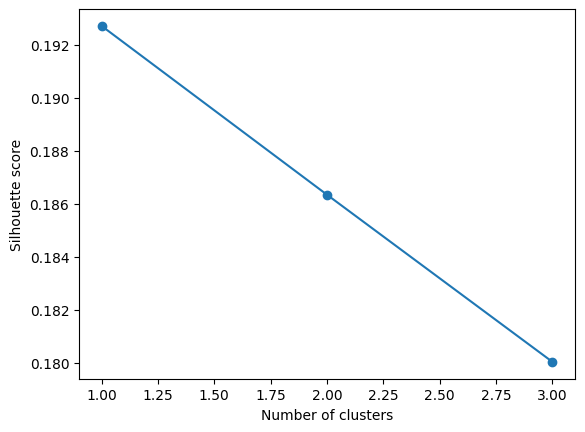

In [4]:
plt.plot(range(1, k-1), silhoutte_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Metodos de agrupamiento
- k-means
- dbscan
- jerarquico
- k++
- k-medoids
- spectral

In [5]:
def plot_clusters(predictions, X): 
    plt.scatter(X[:, 0], X[:, 1], c=predictions)
    plt.show()

In [11]:
# TODO: Find the best number of clusters using the silhouette score
best_k = 10
kmeans = sklearn.cluster.KMeans(n_clusters=best_k)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)

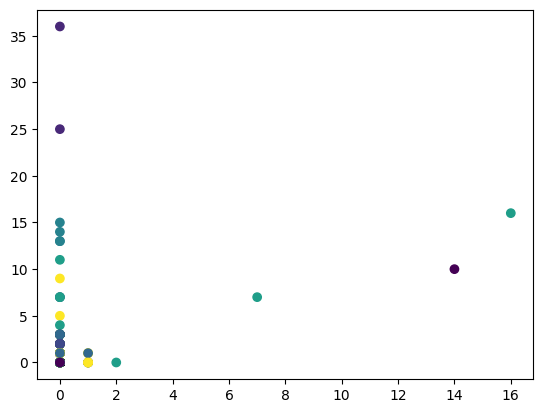

In [12]:
plot_clusters(y_pred, X_train)

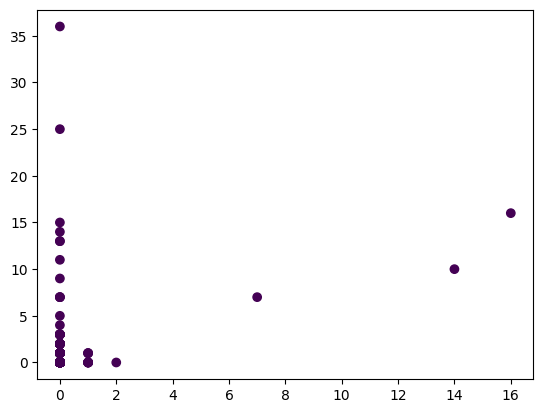

In [13]:
dbscan = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)
y_pred = dbscan.fit_predict(X_train)

plot_clusters(y_pred, X_train)

In [ ]:
jerarquic = sklearn.cluster.AgglomerativeClustering(n_clusters=10)
y_pred = jerarquic.fit_predict(X_train)

plot_clusters(y_pred, X_train)

In [ ]:
medoids = sklearn_extra.cluster.KMedoids(n_clusters=10)
y_pred = medoids.fit_predict(X_train)

plot_clusters(y_pred, X_train)

# EVALUACION DE CALIDAD

In [ ]:
# TODO: Utilizar metodos como matriz de confusion, f1-score, precision, recall, etc